<a href="https://colab.research.google.com/github/Bizzzzan/5005CMD_project/blob/main/5004CMD_Q1)e)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Trips <1 Mile  Trips 1-3 Miles  Trips 10-25 Miles  \
Week of Date                                                      
Week 32        3.259764e+08     3.694767e+08        231078511.0   

              Trips 100-250 Miles  Trips 25-50 Miles  Trips 250-500 Miles  \
Week of Date                                                                
Week 32                 6850130.0       6.915913e+07            1829242.0   

              Trips 3-5 Miles  Trips 5-10 Miles  Trips 50-100 Miles  \
Week of Date                                                          
Week 32          1.815558e+08       233444464.0        1.887832e+07   

              Trips 500+ Miles  
Week of Date                    
Week 32           3.443101e+06  
  Week of Date  Distance         Trips
0      Week 32       0.5  3.259764e+08
1      Week 32       2.0  3.694767e+08
2      Week 32      17.5  2.310785e+08
3      Week 32     175.0  6.850130e+06
4      Week 32      37.5  6.915913e+07
5      Week 32     

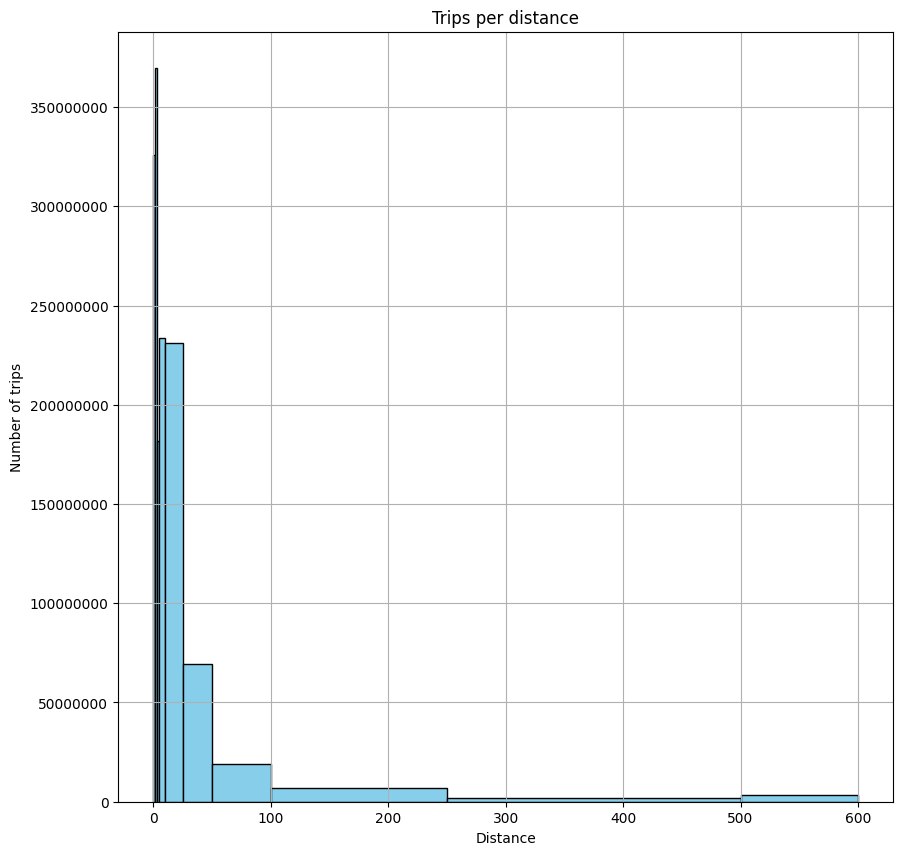

In [10]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
#get the midpoints between the mile ranges for each column
distance_midpoints = {
    'Trips <1 Mile': 0.5,
    'Trips 1-3 Miles': 2,
    'Trips 3-5 Miles': 4,
    'Trips 5-10 Miles': 7.5,
    'Trips 10-25 Miles': 17.5,
    'Trips 25-50 Miles': 37.5,
    'Trips 50-100 Miles': 75,
    'Trips 100-250 Miles': 175,
    'Trips 250-500 Miles': 375,
    'Trips 500+ Miles': 600
}

#read dataset
df_full = dd.read_csv("/content/Trips_Full Data (2).csv")

#ensure there's only unique values in the week column
df_full['Week of Date'].nunique().compute()

#group how far the average population is travelling
peopleTravellingVsDistance = df_full.groupby(by = 'Week of Date')['Trips <1 Mile', 'Trips 1-3 Miles',
'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles', 'Trips 25-50 Miles', 'Trips 50-100 Miles',
'Trips 100-250 Miles', 'Trips 250-500 Miles', 'Trips 500+ Miles'].mean().compute()
print(peopleTravellingVsDistance)

#transforms dataframe into long format
peopleTravellingVsDistance = peopleTravellingVsDistance.reset_index()
peopleTravellingVsDistance_melted = peopleTravellingVsDistance.melt(id_vars=['Week of Date'], var_name='Distance', value_name='Trips')

#replace the miles columns with their corresponding midpoints
peopleTravellingVsDistance_melted['Distance'] = peopleTravellingVsDistance_melted['Distance'].map(distance_midpoints)
print(peopleTravellingVsDistance_melted)

#plot histogram
plt.figure(figsize=(10, 10))
plt.hist(peopleTravellingVsDistance_melted['Distance'],
         weights=peopleTravellingVsDistance_melted['Trips'],
         bins=[0,1,3,5,10,25,50,100,250,500,600], color='skyblue',
         edgecolor='black')
plt.ticklabel_format(style='plain')
plt.xlabel("Distance")
plt.ylabel("Number of trips")
plt.title("Trips per distance")
plt.grid()
plt.show()